18.3 Homework
Try different minimization methods in scipy on larger systems ( 𝑁  up to 20), and show

1 the average number of attempts to find the ground state
2 the time costs
Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution

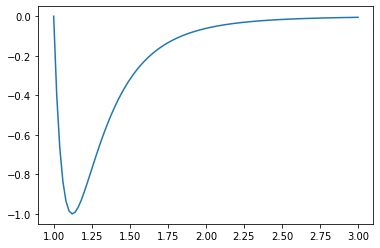

minimum value:    -0.999955009866677
[1.12121212]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#assume ep = sigma

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

r = np.linspace(1.0,3.0,100)
plt.plot(r, LJ(r))
plt.show()

print('minimum value:   ', min(LJ(r)))
min_ = min(LJ(r))
array = LJ(r)
x = np.where(array == min_)
print(r[x])

In [4]:


import numpy as np
import scipy.optimize

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))
    
init_pos(3,L=5)

array([0.29821312, 4.3520117 , 0.05984066, 3.21190087, 2.64544495,
       3.43377706, 4.38164911, 3.05357146, 4.25819569])

In [6]:
#HW 17.5

points = init_pos(5,L=5)
total_energy(points)
res = scipy.optimize.minimize(total_energy,points,method='CG',tol = 1e-4)
print(res.fun)

-9.10385241565093


In [12]:
#HW 17.5 - tried another way but was getting greater min

def pos_total_e(N,runs):
    
    array_runs = []
    
    for i in list(range(runs)):
        poss = init_pos(N,L=5)
        tot_e = total_energy(poss)
        array_runs.append(tot_e)
    #print('minimum value:   ', min(array_runs))
    min_ = min(array_runs)
    #print(array_runs)
    return min_
        
pos_total_e(5,100000)

-4.499611946676621